In [29]:
# import bank
import pandas as pd
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats
from pandas.plotting import scatter_matrix

from IPython.display import Image
from IPython.core.display import HTML 

from sklearn.neighbors import KNeighborsClassifier

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# Loading The Data
Here I will read in the data and print out some basic information and then take a quick look at the data.

In [3]:
# read in data
spotify_songs = pd.read_csv('datasets_1833_3172_data.csv')

print('Quick look at the data')
spotify_songs.head()

Quick look at the data


Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [4]:
# drop unnamed
spotify_songs.drop("Unnamed: 0", axis=1, inplace=True)

# explore data
print('Info About Data:')
print('\n')
print(spotify_songs.info())
print('\n')
print('NA/blanks Output by Column:')
print('\n')
print(spotify_songs.isna().sum())

Info About Data:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4

Nice! No missing data points an all integers. Talk aout ready for Data Science!

In [5]:
spotify_songs.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

# Explore

Below we will do some exploratory analysis on the the data set and it's features.

In [6]:
labels = ["Liked Songs","Not Liked Songs"]
values = spotify_songs['target'].value_counts().tolist()

fig = px.pie(spotify_songs, values=values, names=labels,
             title="Liked/Not-Liked Songs Distribution Pie Chart", 
             color_discrete_sequence=["purple", "blue"])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent')

In [7]:
values = spotify_songs['artist'].value_counts().tolist()[:20]
names = list(dict(spotify_songs['artist'].value_counts()).keys())[:20]

fig = go.Bar(x = names,
             y = values,
             marker = dict(color = 'lightgreen',
                         line=dict(color='black',width=1.5)))

layout = go.Layout(paper_bgcolor = 'white', plot_bgcolor = 'white')

fig = go.Figure(data = fig, layout = layout)

fig.update_layout(title_text='Top Artists')

fig.show()

Here I'll create a function to so we can look at historgrams of different types of features. This will provide us a visual of the distribution on the features for the songs in the data set.

In [8]:
# function for hist plots

# issues w/ if statement
# issue w/ single plot

def plot_histo(cols, color = '', hue = '', fig_size = (20, 30)):
    
    plt.style.use("seaborn")
    sns.set_theme(style="ticks")
    
    fig, ax = plt.subplots(len(cols), 1, figsize = fig_size) 

    i = 0
    
    for c in cols:
        if hue:
            sns.histplot(x = spotify_songs[c], kde = True, ax = ax[i], palette = color[i], hue = hue)
        else:
            sns.histplot(x = spotify_songs[c], kde = True, ax = ax[i], color = color[i])
        sns.despine()
        ax[i].set_xlabel(c, fontsize = 15)
        i = i + 1

Now I will use that on a variables between 0 and 1

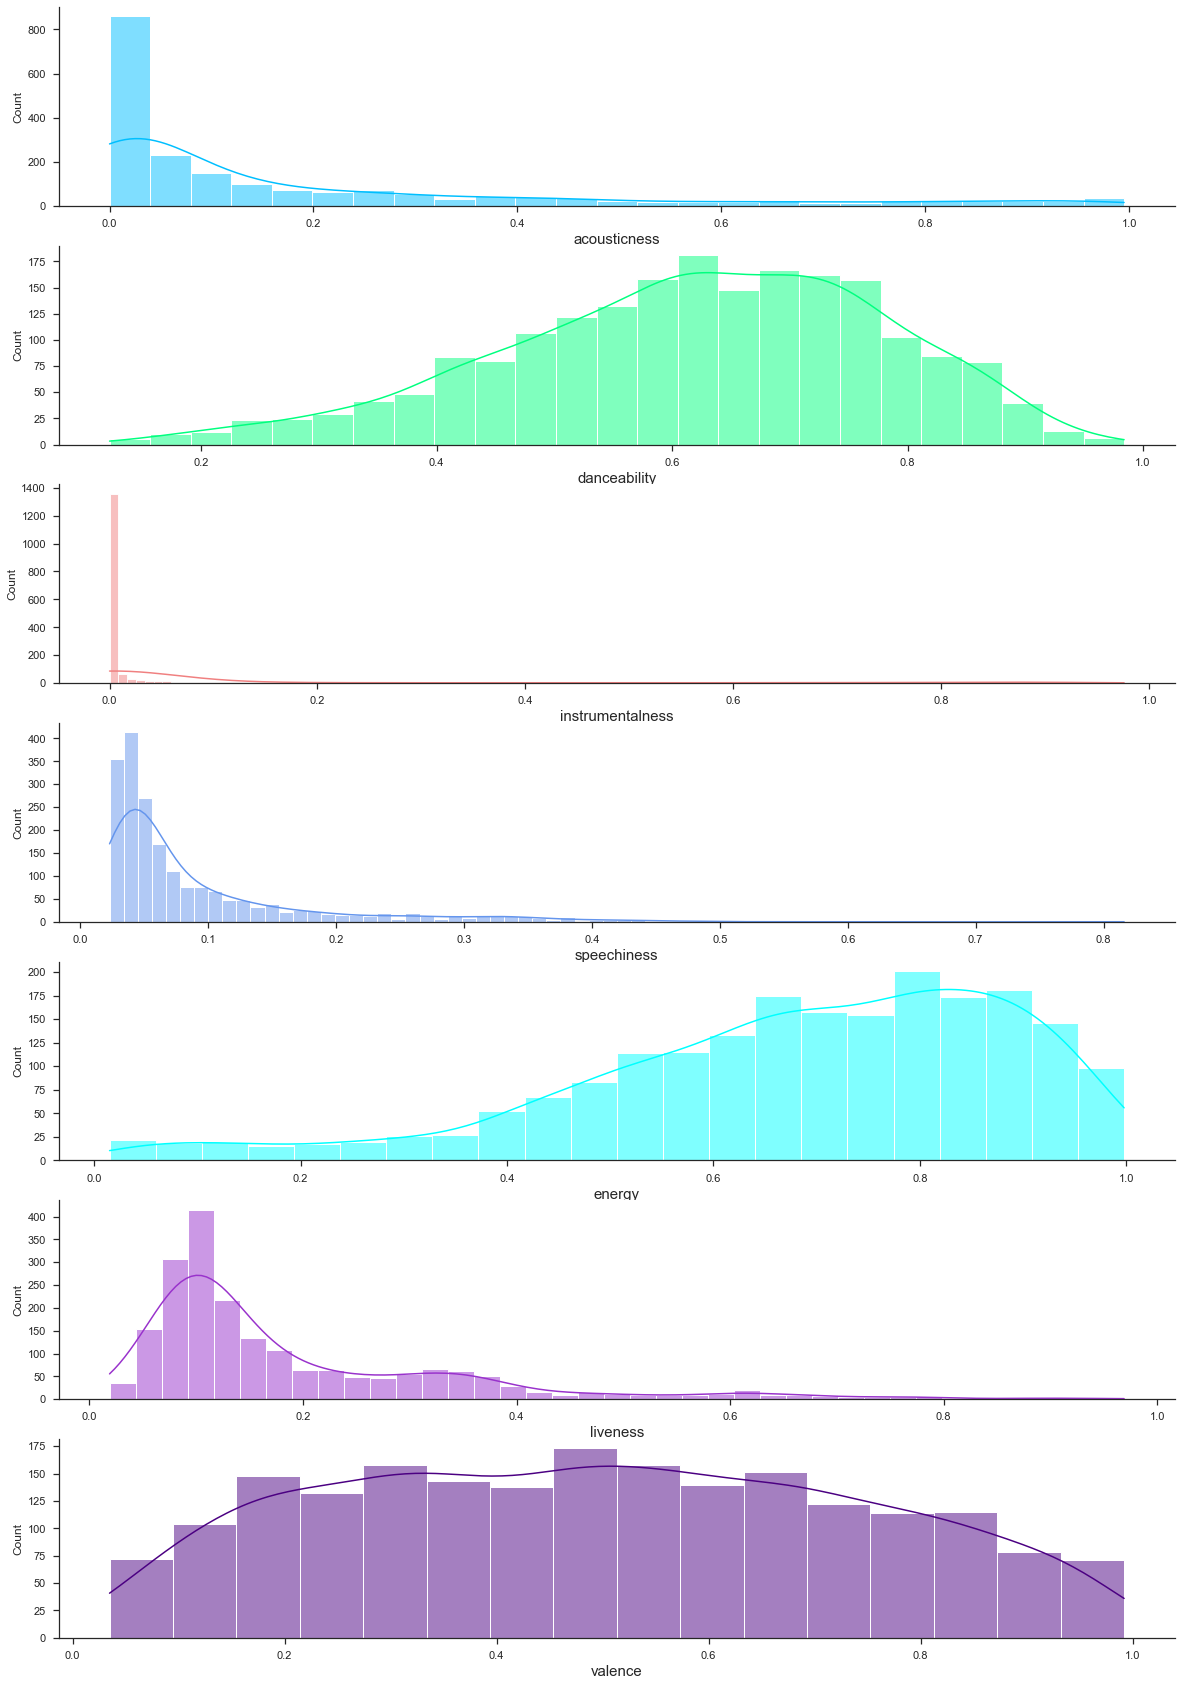

In [9]:
plt_cols = [
    'acousticness',
    'danceability',
    'instrumentalness',
    'speechiness',
    'energy',
    'liveness',
    'valence'
]

plt_colr = [
    'deepskyblue',
    'springgreen',
    'lightcoral',
    'cornflowerblue',
    'cyan',
    'darkorchid',
    'indigo'
]

plot_histo(plt_cols, plt_colr)

And then I will use them on the variables that are not between 0 and 1.

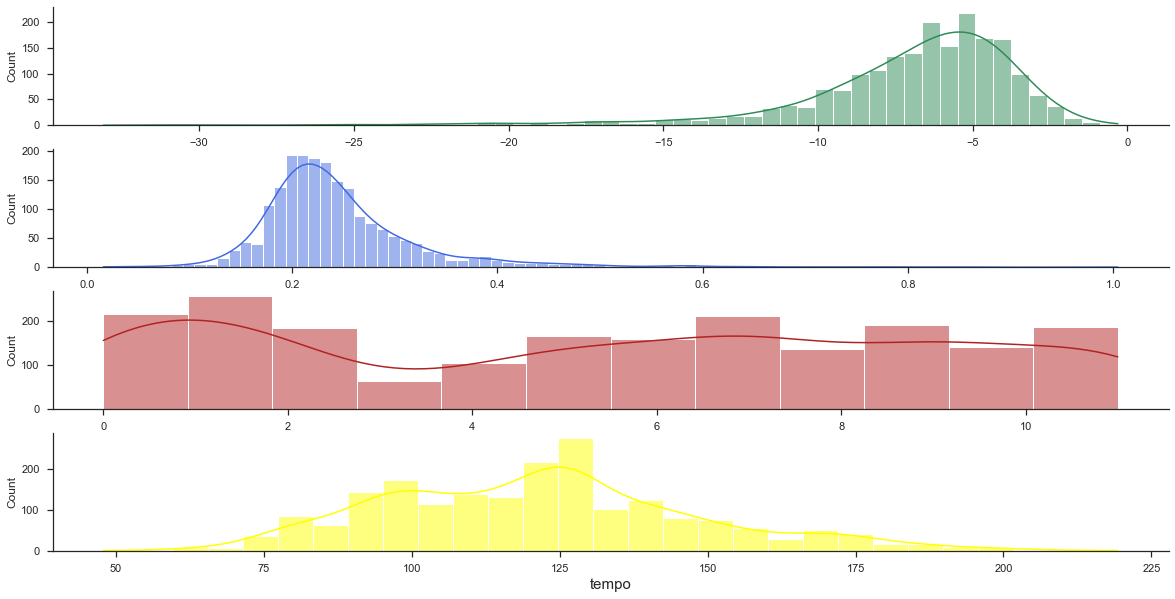

In [10]:
plt_cols = [
    'loudness',
    'duration_ms',
    'key',
    'tempo'
]

plt_colr = [
    'seagreen',
    'royalblue',
    'firebrick',
    'yellow'
]

plot_histo(plt_cols, plt_colr, fig_size = (20, 10))

Lastly, I will look at the distribution of features in comparison to the target variable.

In [11]:
def plot_histo2(cols, color = '', hue = '', fig_size = (20, 30)):
    
    plt.style.use("seaborn")
    sns.set_theme(style="ticks")
    
    fig, ax = plt.subplots(len(cols), 1, figsize = fig_size) 

    i = 0
    
    for c in cols:
        sns.histplot(x = spotify_songs[c], kde = True, ax = ax[i], palette = color[i], hue = hue)
        sns.despine()
        ax[i].set_xlabel(c, fontsize = 15)
        i = i + 1

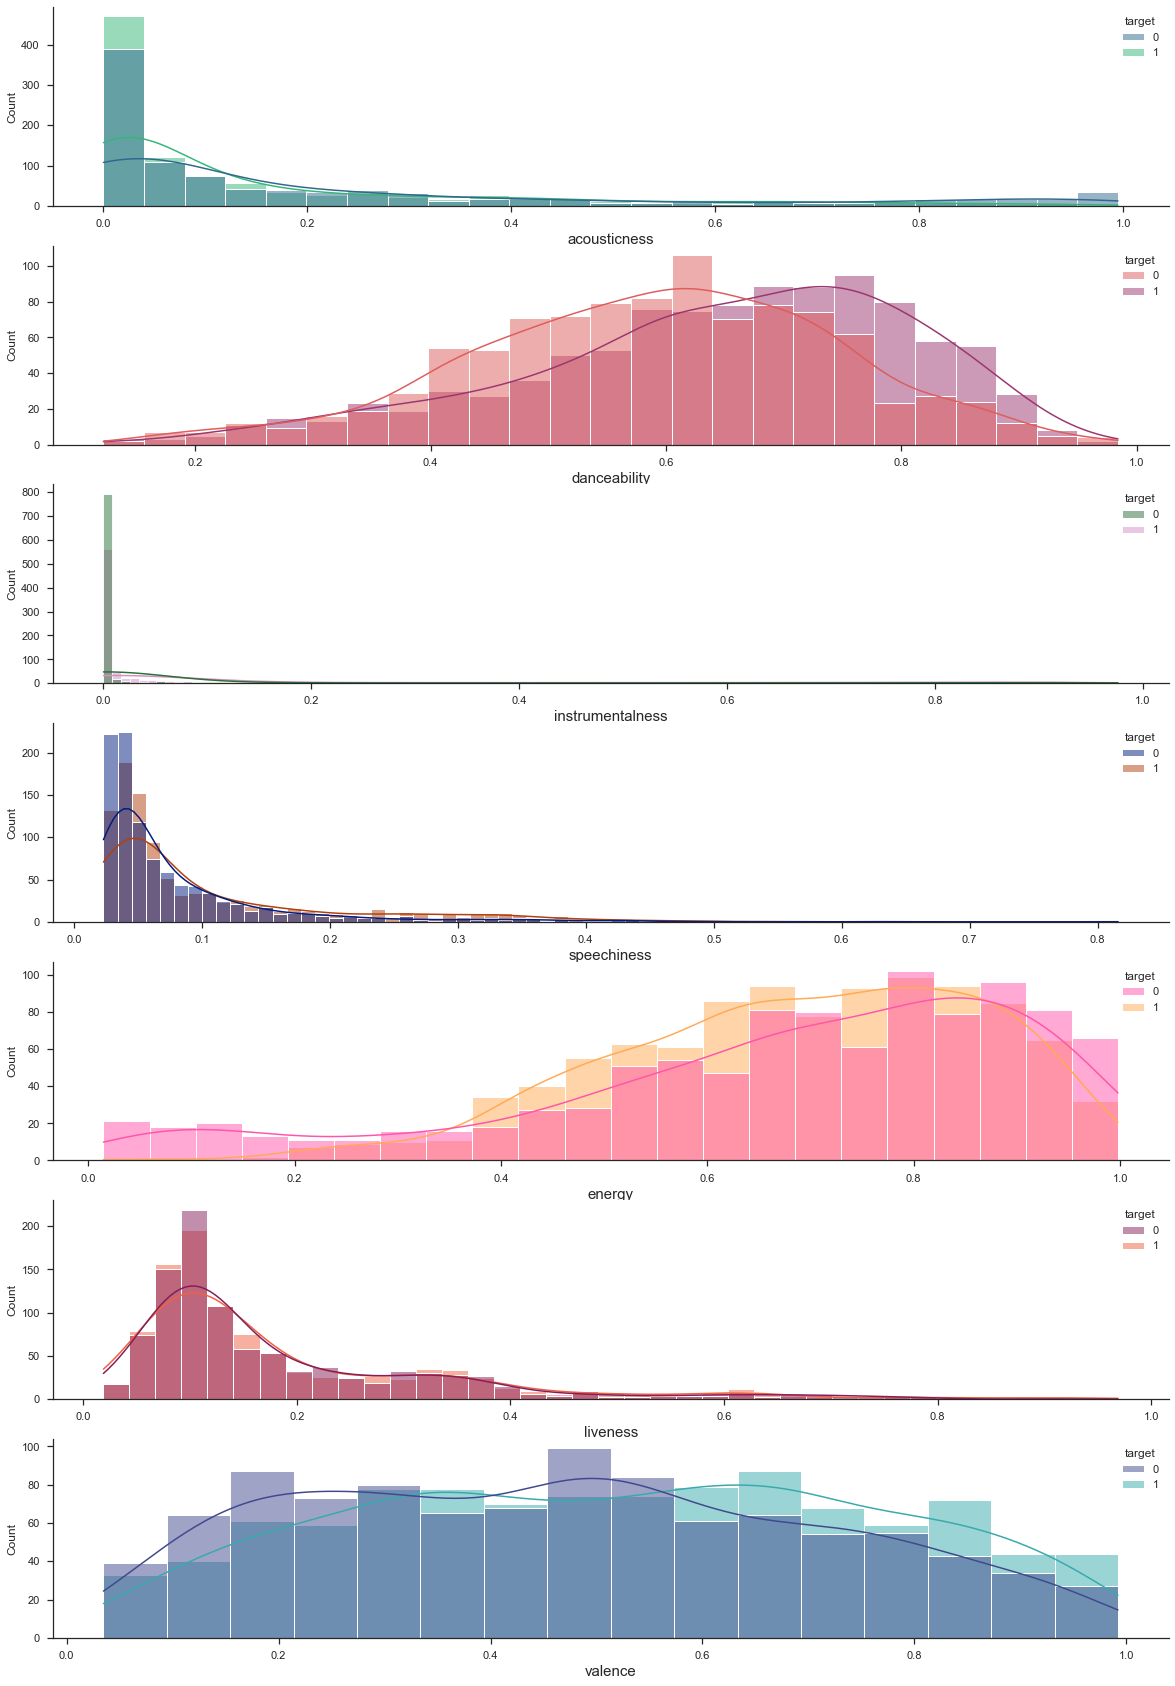

In [12]:

plt_cols = [
    'acousticness',
    'danceability',
    'instrumentalness',
    'speechiness',
    'energy',
    'liveness',
    'valence'
]
colr_palette = [
    'viridis',
    'flare',
    'cubehelix',
    'dark',
    'spring',
    'rocket',
    'mako',
    'seagreen'
]

plot_histo2(plt_cols, colr_palette, hue = spotify_songs['target'])

Here I will look at the relationship between variables.

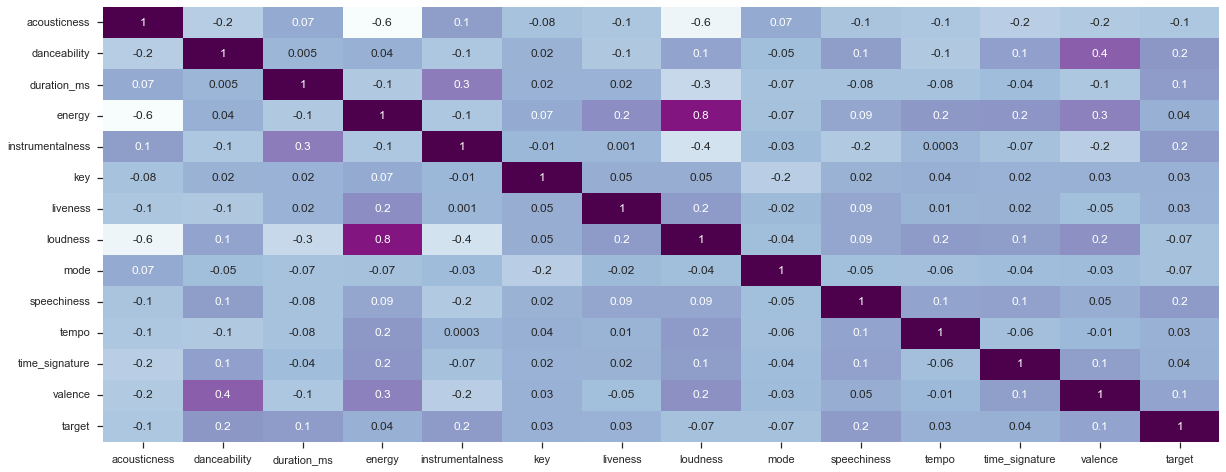

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(spotify_songs.corr(), annot=True, fmt='.1g', cmap="BuPu", cbar=False);

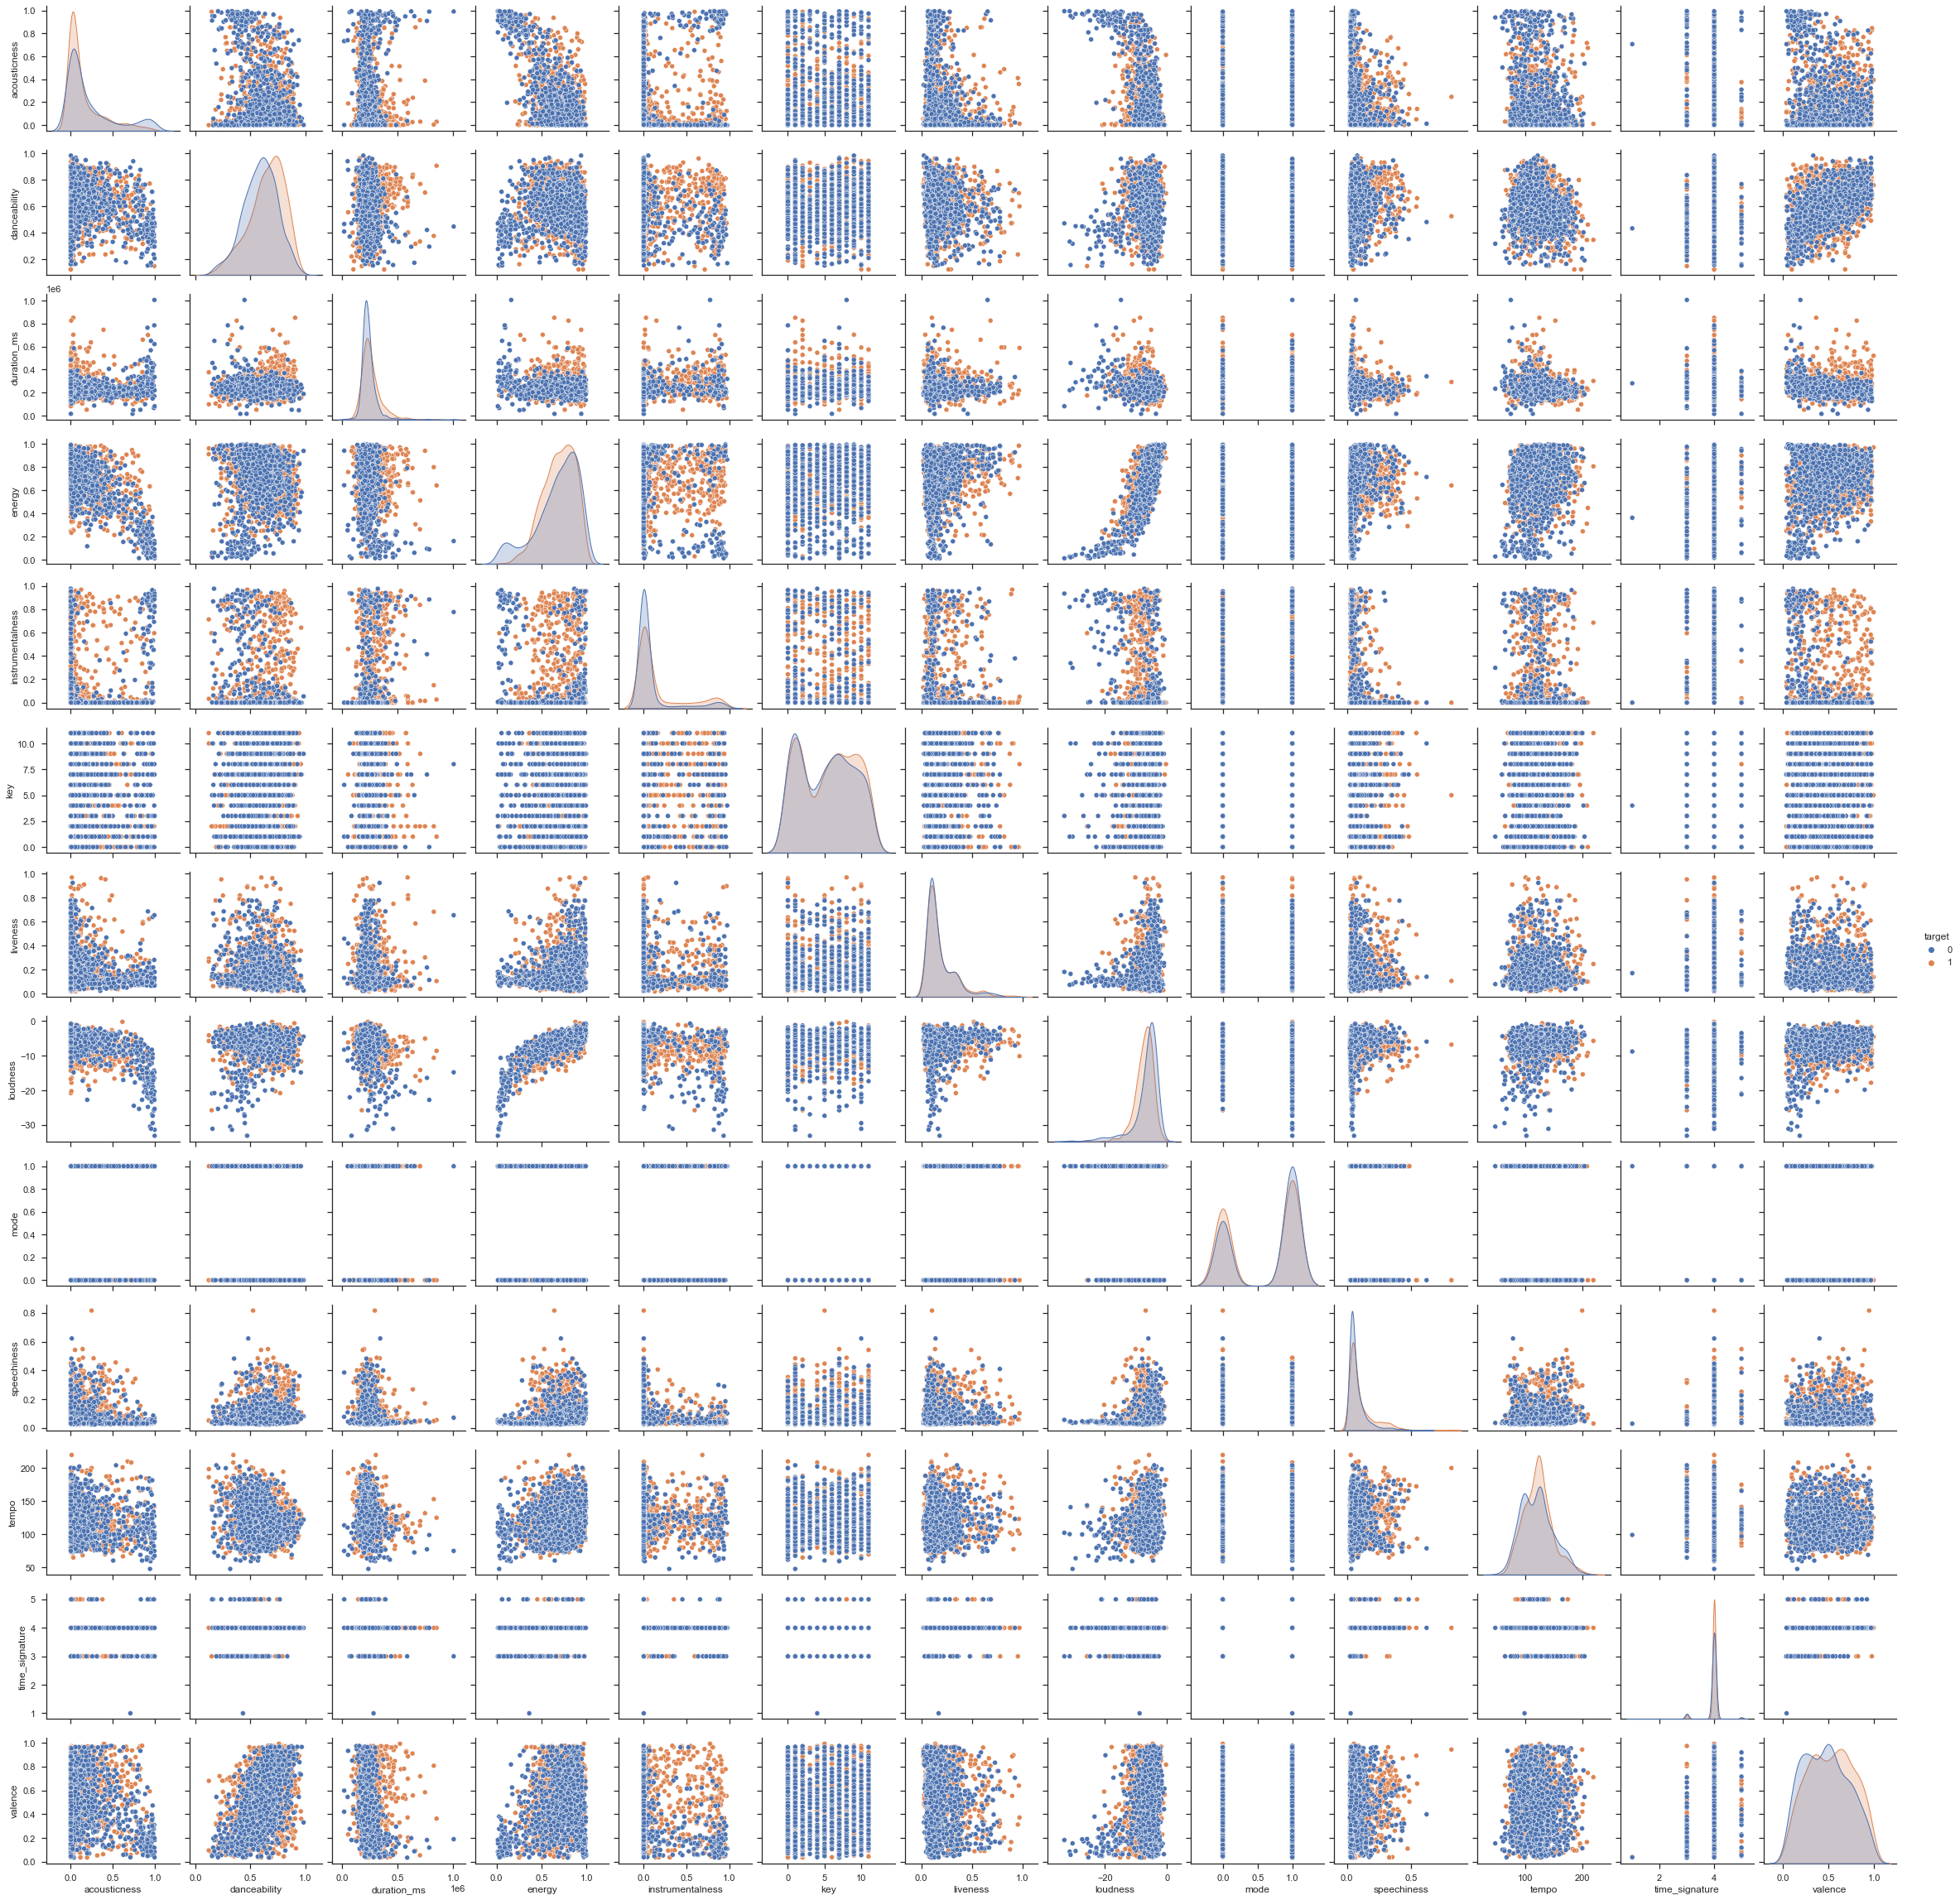

In [14]:
sns.set_theme(style="ticks")
sns.pairplot(spotify_songs, hue="target")

# Analysis

I like the variable `danceability` so I'm going to focus on that.
My hypothesis is that this person on average likes songs that have more dancibly because who doesn't like to Dance?!?!

- **Null Hypothesis**: On average there is no statistically significant difference between how this person feels the danceability in songs. Average Danceability of Liked Songs - Average Danceability of Not Liked Songs = 0

*working on gif

<iframe src="https://giphy.com/embed/GW4iIsM8ETd8k" width="480" height="357" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/snoop-dogg-GW4iIsM8ETd8k">via GIPHY</a></p>

Text(0.5, 0, 'danceability')

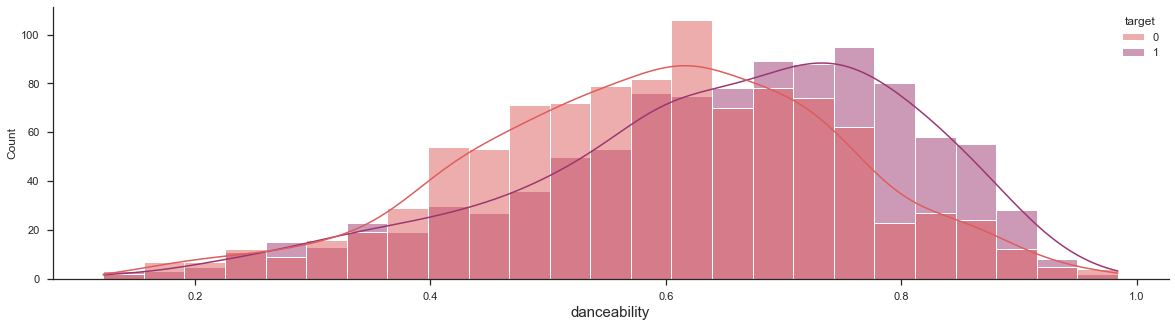

In [15]:
plt.style.use("seaborn")
sns.set_theme(style="ticks")
fig, ax = plt.subplots(1, 1, figsize = (20, 5)) 

sns.histplot(x = spotify_songs['danceability'], kde = True, palette = 'flare', hue = spotify_songs['target'])
sns.despine()
ax.set_xlabel('danceability', fontsize = 15)

In [16]:
# Split up the dataset
liked_dance = spotify_songs[(spotify_songs['target'] == 1)]
not_liked_dance = spotify_songs[(spotify_songs['target'] == 0)]
print(stats.describe(liked_dance['danceability']))
print(stats.describe(not_liked_dance['danceability']))

DescribeResult(nobs=1020, minmax=(0.122, 0.962), mean=0.6465470588235295, variance=0.02660433242509958, skewness=-0.6504751494659127, kurtosis=-0.030967299729999898)
DescribeResult(nobs=997, minmax=(0.152, 0.984), mean=0.5896479438314945, variance=0.023627937176992825, skewness=-0.2513353326742796, kurtosis=-0.09673696427894285)


Based on both the histograms and the statistics, it appears that the samples of this variable are normally distributed. So lets dance!

In [17]:
stats.ttest_ind(liked_dance['danceability'], not_liked_dance['danceability'])

Ttest_indResult(statistic=8.058923078730047, pvalue=1.3051748098692591e-15)

We can reject the null from either of these results:

- The test statistic is greater than 1.96.
- The p-value is less than 0.05.

In [18]:
# function to get confidence intervals
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(liked_dance['danceability'], not_liked_dance['danceability'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.07072812179485365 and -0.04307010818921621.'

[[Text(0, 0, 'liked'), Text(1, 0, 'not liked')]]

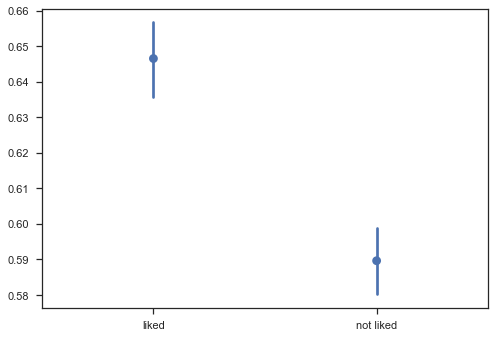

In [19]:
g = sns.pointplot(data=[liked_dance['danceability'], not_liked_dance['danceability']], join=False)
                        
g.set(xticklabels = ['liked', 'not liked'])

It is safe to say this person likes more danceable songs!

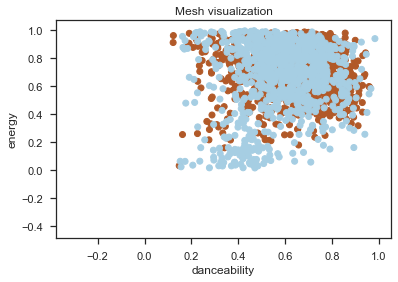

In [39]:
neighbors = KNeighborsClassifier(n_neighbors=10)
X = spotify_songs[['danceability', 'energy']].to_numpy()
Y = spotify_songs.target.to_numpy()
neighbors.fit(X,Y)

X = np.array(X)
Y = np.array(Y)

# Mesh size
h = 4.0

# Plot the decision boundary and assign a color to each point in the mesh
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('danceability')
plt.ylabel('energy')
plt.title('Mesh visualization')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())

plt.show()

In [37]:
print(x_min)
print(x_max)

0.072
1.034
